# Data Preprocessing Tools
1, Simple Linear Regression: Ordinary Least squares
y=b0+b1X1

2, Multiple Linear Regression: 
y=b0+b1X1+b2X2+....+bnXn
1)Assumption of lineear regression by check the scatter plot:1, Linearity, 2, Homescedasticity, 3, Multivariate Normality, 4, Independence, 5, Lack of Multicollinearity, 6, The outlier check. 
2)Dummy Variable trap: alway to exlude 1 dummy variable to avoid the multicollinearity.
3)Statistical significance
4)Building a model: Stepwise Regression(Backward, forward, bidirection elimination), All models(2^n-1) compare score

3, Polynomial linear Regression:
y=b0+b1X1+b2X1^2+....+bnX1^n
1)work better desease spread, pendemic spread.
2)why still call linear regression model? The combination of coeficients are still dependent to plug and replace with signle values.
3)dataset is nonlinear shape.

linear Support Vector for Regression (SVR)(Non linear kernel SVR models will be more robust):
1)A line becomes a tube with tolerance error of e. For data outside of the tube will be minunized the distance to support the vector.
2)Transformation and inverse of transformation
3)Scaling cause linear, multilinear, Poly has coefficient to compensate the scales. but not SVR and other models

4, Decision Tree Regression
1)CART -Decision Tree Classification(Predict a category) VS. Decision Tree Regression(Predict a continious value)
2)Decision tree, split into terminal leaves, take average Y as Y hat to predict the leaves's y
3)The sample data has only 1 features, but the model will accomadate multiple features
4)For visualizaiton, need to grid it for better visualization. no feature scaling requred.

5,Random Forest Regression
1)A Random Forest is to combines multiple Decision Trees, creating a "forest" of trees to make predictions based on average of Yhat,making Random Forests generally more accurate and less prone to overfitting compared to a single Decision Tree, but also less interpretable due to their complex ensemble nature.
2) 2 importand parameters are essential to tell how many rounds and subset size to run the model:  n_estimators=100, random_state=42

Summary:Goodness of fitness:
R-Square: R^2 = 1-SS(residual)/SS(total)
Adjusted  R-Square: consider the k of features that were used, take out the impact of more k of features, larger R^2.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [4]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Taking care of missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

print(X)

## Encoding categorical data

### Encoding the Independent Variable

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

### Encoding the Dependent Variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(X_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [7]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [8]:
print(y_train)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]


In [9]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431.]


## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [11]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


#Simple Linear Regression

In [12]:
#Training the linear regression model 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
fit=regressor.fit(X_train,y_train)

In [13]:
#Predicting the test set results
y_pred=regressor.predict(X_test)


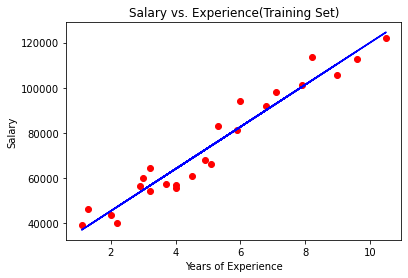

In [14]:
#Visualize the training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('Salary vs. Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

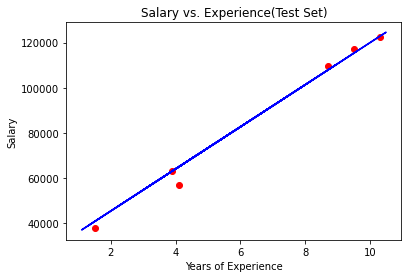

In [15]:
#Visualize the test set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')# No need to switch from train to test set because the regression line is same algorizm.
plt.title('Salary vs. Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Making a single prediction

Salary=9312.6×YearsExperience+26780.1 

Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138531.

Important note: Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

12→scalar 

[12]→1D array 

[[12]]→2D array 

In [16]:
print(regressor.predict([[12]]))
print(regressor.coef_)
print(regressor.intercept_)

[138531.00067138]
[9312.57512673]
26780.09915062818


In [17]:
#Multiple Linear Regression(There is no need to apply feature scaling)
dataset_2 = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')
X_2 = dataset_2.iloc[:, :-1].values
y_2 = dataset_2.iloc[:, -1].values
print(X_2)
#Create Dumming Variable
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') 
X_2 = np.array(ct.fit_transform(X_2))

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [18]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

In [19]:
X_test_2

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [20]:
#All Model comparison and selected the most high p-value as the final model by using the sklearn LinearRegression
from sklearn.linear_model import LinearRegression
regressor2=LinearRegression()
fit2=regressor2.fit(X_train_2, y_train_2)

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
[181566.92]
[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248579056


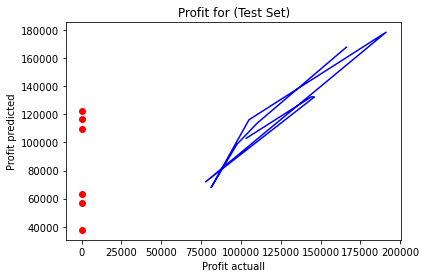

In [21]:
#Evaluation Models with test dataset
y_pred_2=regressor2.predict(X_test_2)
np.set_printoptions(precision=2)
#Concatenate 2 vectors vertically and make it a data frame. Use '.reshape' to transpose the vector from horizontal to vertical
print(np.concatenate(( y_pred_2.reshape(len(y_pred_2),1) , y_test_2.reshape(len(y_test_2),1) ),1))
#Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')
print(regressor2.predict([[1,0,0,160000,130000,300000]]))

#Getting the final linear regression equation with the values of the coefficients
print(regressor2.coef_)
print(regressor2.intercept_)

#plot the predicted value vs the actual value for the test dataset.
plt.scatter(X_test,y_test,color='red')
plt.plot(y_test_2, y_pred_2,color='blue')# No need to switch from train to test set because the regression line is same algorizm.
plt.title('Profit for (Test Set)')
plt.xlabel('Profit actuall')
plt.ylabel('Profit predicted')
plt.show()

#Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

In [46]:
#Polynomial Regression
dataset_3 = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')
X_3 = dataset_3.iloc[:, 1:-1].values
y_3 = dataset_3.iloc[:, -1].values

#y=b0+b1X1+b2X1^2+....+bnX1^n consider x1 x1^2, x1^3...x1^n as features, then conduct a multiple linear regression on those n features.
#first step created features.
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)#pick a n degree to try it out(2,3,4).
X_poly=poly_reg.fit_transform(X_3)#transform feature to features: x1 x1^2 x1^3

#second step conduct multiple linear regression.
lin_reg_poly=LinearRegression()
lin_fit_poly=lin_reg_poly.fit(X_poly, y_3)
y_pred_3=lin_reg_poly.predict(X_poly)

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_fit=lin_reg.fit(X_3, y_3)

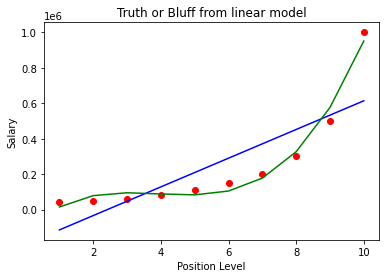

In [48]:
#Visualing the Linear Regressioin
plt.scatter(X_3, y_3, color="red")#Dataset
plt.plot(X_3, lin_reg.predict(X_3), color='blue')#Lilear Regression prediction.
plt.plot(X_3, lin_reg_poly.predict(X_poly), color='green')#Poly regression prediction.
plt.title('Truth or Bluff from linear model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [25]:
#Prediction a value with the linear regression vs Polynomial regression
print(f" the Linear regression result: {lin_reg.predict([[6.5]])}")#should be an array"[[ ]]" in the bracket for prediction
print(f" the Polynomial regression result: {lin_reg_poly.predict(poly_reg.fit_transform([[6.5]]))}")# Care for with the X_poly which will be a transformed x1 x1^2 x1^3.



 the Linear regression result: [330378.79]
 the Polynomial regression result: [133259.47]


In [77]:
#Support Vector Regression(SVR)
dataset_4 = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
X_4 = dataset_4.iloc[:, 1:-1].values
y_4 = dataset_4.iloc[:, -1].values
print(X_4)
print(y_4)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [78]:
#Feature Scaling and Transforming.(feature and dependent variable will both received scaling)
#step 1, change it to acceptable 2d array
y_4_=y_4.reshape(len(y_4),1)
#step 2 transform
from sklearn.preprocessing import StandardScaler#X and y has different mean and standard deviation. so two sc needs to be created.
sc_X = StandardScaler() 
sc_y=StandardScaler()
X_4_tf=sc_X.fit_transform(X_4)
y_4_tf = sc_y.fit_transform(y_4_)
print(X_4_tf)
print(y_4_tf)


[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]
[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


In [79]:
#Train on the SVR model
from sklearn.svm import SVR
regressor4=SVR(kernel='rbf') #select from the kernel method
fit4=regressor4.fit(X_4_tf, y_4_tf)#put scaled x and y into the model to train.


/Users/lipingsun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [80]:
#Predict a new value based on the model and reverse the y to orignal scale
y_pred_4=sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_4)).reshape(-1,1))
sc_y.inverse_transform(regressor4.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.02]])

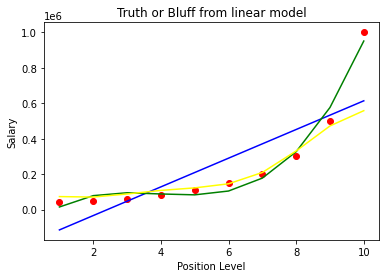

In [81]:
#Compare and visualize to linear, polynomial, and SVR.
plt.scatter(X_3, y_3, color="red")#Dataset
plt.plot(X_3, lin_reg.predict(X_3), color='blue')#Lilear Regression prediction.
plt.plot(X_3, lin_reg_poly.predict(X_poly), color='green')#Poly regression prediction.
plt.plot(X_4, sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_4)).reshape(-1,1)),color='yellow')
plt.title('Truth or Bluff from linear model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [52]:
#Decision Tree Regression
dataset_5 = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 8 - Decision Tree Regression/Python/Position_Salaries.csv')
X_5 = dataset_5.iloc[:, 1:-1].values
y_5 = dataset_5.iloc[:, -1].values
print(X_5)
print(y_5)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [56]:
from sklearn.tree import DecisionTreeRegressor #will predict a continues value, but DecisionTree will predict a category
regressor5=DecisionTreeRegressor(random_state=0)
fit5=regressor5.fit(X_5, y_5)
y_pred_5=regressor5.predict(X_5)

In [57]:
regressor5.predict([[6.5]])

array([150000.])

Text(0, 0.5, 'Salary')

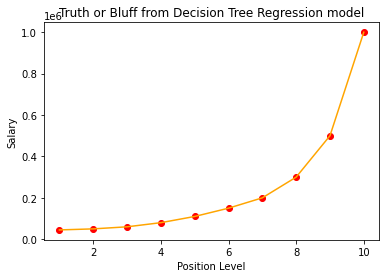

In [34]:
plt.scatter(X_5,y_5,color="red")
plt.plot(X_5,regressor5.predict(X_5),color='Orange')
plt.title('Truth or Bluff from Decision Tree Regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')

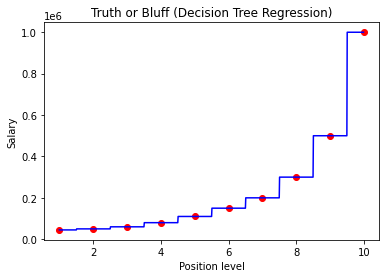

In [35]:
#Improve the visual bility by grid
X_grid = np.arange(min(X_5), max(X_5), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_5, y_5, color = 'red')
plt.plot(X_grid, regressor5.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [36]:
#Random Forest Regression
dataset_6 = pd.read_csv('/Users/lipingsun/Desktop/wcpa/Python/ML/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 9 - Random Forest Regression/Python/Position_Salaries.csv')
X_6 = dataset_5.iloc[:, 1:-1].values
y_6 = dataset_5.iloc[:, -1].values
print(X_6)
print(y_6)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [82]:
from sklearn.ensemble import RandomForestClassifier
regressor6=RandomForestClassifier(n_estimators=10, random_state=0)
fit6=regressor6.fit(X_6, y_6)
y_pred_6=regressor6.predict(X_6)
y_hat6=regressor6.predict([[6.5]])
print(f" predicted salary for 6.5 level is {y_hat6}")

 predicted salary for 6.5 level is [150000]


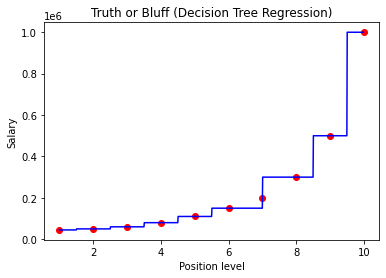

In [83]:
X_grid = np.arange(min(X_6), max(X_6), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_6, y_6, color = 'red')
plt.plot(X_grid, regressor6.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [84]:
#Summary 6 models R^2 and pick the highest one as the best fit model:
from sklearn.metrics import r2_score
R_Linear=r2_score(y_test,y_pred)
R_Multi=r2_score(y_test_2,y_pred_2)
R_Poly=r2_score(y_3,y_pred_3)
R_SVR=r2_score(y_4,y_pred_4)
R_Tree=r2_score(y_5,y_pred_5)
R_Forest=r2_score(y_6,y_pred_6)

In [85]:
print(R_Linear)
print(R_Multi)
print(R_Poly)
print(R_SVR)
print(R_Tree)
print(R_Forest)


0.988169515729126
0.9347068473281415
0.9812097727913366
0.7516001070620797
1.0
0.9969006567508345
